In [1]:
import re,xlrd, xlsxwriter, os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
PATH = r"C:\Users\wodms\OneDrive\바탕 화면"
os.chdir(PATH)
os.listdir()

['.ipynb_checkpoints',
 '17',
 '18(상)',
 '18(하)',
 'bus_gu.csv',
 'desktop.ini',
 'handson',
 'JetBrains PyCharm Community Edition 2018.2.3 x64.lnk',
 'kaggle',
 'LD_공간과가치_유동인구수.txt',
 'people.csv',
 'people.html',
 'people1.csv',
 'profit.csv',
 'seoul.csv',
 'skorea_municipalities_geo_simple.json',
 'starbucks & trash & people data .ipynb',
 'starbucks.html',
 'starbucks2.csv',
 'subway.txt',
 'trash.html',
 'trash_location_finall1.csv',
 'udrims (서울).lnk',
 '새 폴더']

# Starbucks Data Load

In [2]:
import pandas as pd 
starbucks = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\starbucks2.csv', 
                        engine='python', encoding='utf-8')
starbucks = starbucks.reset_index()

In [3]:
starbucks.columns = ['index','s_name', 'lat', 'lot', 'sido_name', 'gu','doro_address','tel']

In [4]:
starbucks2 = starbucks.iloc[:,[1,5]]

In [5]:
starbucks2.head()

,s_name,gu
0,압구정R,강남구
1,수서역R,강남구
2,양재강남빌딩R,강남구
3,선릉동신빌딩R,강남구
4,봉은사로선정릉,강남구


In [6]:
starbucks3 = starbucks2.groupby(['gu']).count()
starbucks3.columns = ['cafe']

In [7]:
starbucks3.head()

,cafe
gu,
강남구,71
강동구,10
강북구,5
강서구,14
관악구,9


# Starbucks Data Google map

In [8]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = r'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [9]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = starbucks3['cafe'],
               columns = [starbucks3.index, starbucks3['cafe']],
               fill_color = 'PuRd', 
               key_on = 'feature.id')
map.save(r'starbucks.html')


# Trash Data Load

In [10]:
trash = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\trash_location_finall1.csv', 
                        engine='python', encoding='utf-8')
trash = trash.reset_index()
trash2 = trash.iloc[:,0:2]
trash2.columns = ['gu','trash']
trash3 = trash2.groupby(['gu']).count()

In [11]:
trash3.head()

,trash
gu,
강남구,946
강동구,404
강북구,164
강서구,213
관악구,131


# Trash Data Google map

In [12]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = trash3['trash'],
               columns = [trash3.index, trash3['trash']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save('trash.html')

# People Data Load

In [13]:
people0 = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\LD_공간과가치_유동인구수.txt', engine='python', header=None, sep='|', encoding='utf-8')
people0 = people0.reset_index()
people0 = people0.iloc[1:,[1,4,5,6,7,8,9,10,11]]
people0['people'] = people0['level_5']+people0['level_6']+people0['level_7']+people0['level_8']+people0['level_9']+people0['level_10']+people0['level_11']
people0 = people0.groupby(['level_1'])['people'].mean().reset_index()
# people0.to_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people.csv')

In [14]:
people = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people.csv', 
                        engine='python', index_col=0,sep='\t')
people

,people
gu,
강남구,7475.529810
강동구,4519.882716
강북구,2518.616801
강서구,2221.806591
관악구,4368.951846
광진구,4383.014648
구로구,5728.976922
금천구,5751.071008
노원구,2459.988383


# People Data Google map

In [15]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = people['people'],
               columns = [people.index, people['people']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save('people.html')

# People1 data Load

In [16]:
people1 = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people1.csv', 
                        engine='python', index_col=0, encoding='utf-8')
people1 = people1.reset_index()
people1.columns = ['gu', 'people1']

# Bus data Load

In [17]:
bus = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\bus_gu.csv', 
                        engine='python', index_col=0, encoding='utf-8')
bus = bus.reset_index()
bus.columns = ['gu', 'bus']

# Profit data Load

In [18]:
profit = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\profit.csv', 
                        engine='python', index_col=0)
profit = profit.reset_index()
profit.columns = ['gu', 'profit', 'store']
profit['profit_avg'] = profit['profit']/profit['store']

# Subway data Load

In [19]:
subway = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\subway.txt', 
                        engine='python', encoding='utf-8', sep='|')
subway = subway.reset_index()
subway = subway[subway['level_0']=="서울특별시"]
subway = subway.iloc[:,[2,9,10]]
subway.columns= ['gu','승차','하차']

In [20]:
subway.head()

,gu,승차,하차
2,중구,2578.287425,2465.709581
3,중구,3611.661677,3602.398204
5,노원구,15142.092814,14587.182635
6,노원구,12618.161677,11460.410180
7,노원구,14407.838710,13473.290323


In [21]:
subway2 = pd.DataFrame({'승차':subway.groupby(['gu'])['승차'].mean(),
              '하차':subway.groupby(['gu'])['하차'].mean()})
subway2 = subway2.reset_index()

# People & Starbucks & Trash data merge 

In [22]:
people = people.reset_index()
starbucks3 = starbucks3.reset_index()
trash3 = trash3.reset_index()

In [23]:
a = pd.merge(people, starbucks3)
seoul = pd.merge(a, trash3)
# seoul.to_csv(r'C:\Users\wodms\OneDrive\바탕 화면\seoul.csv')

In [24]:
seoul1 = pd.merge(seoul, people1)
seoul2 = pd.merge(seoul1, bus)
seoul3 = pd.merge(seoul2, profit)
seoul4 = pd.merge(seoul3, subway2)

In [25]:
seoul4['지하철'] = seoul4['승차']+seoul4['하차']
seoul4['대중교통'] = seoul4['승차']+seoul4['하차']+seoul4['bus']

In [27]:
seoul4.head()

,gu,people,cafe,trash,people1,bus,profit,store,profit_avg,승차,하차,지하철,대중교통
0,강남구,7475.529810,71,946,815032.026498,135.736970,127163.200000,84.400000,1506.672986,21171.628043,21994.006864,43165.634907,43301.371877
1,강동구,4519.882716,10,404,483383.118529,136.285111,114162.000000,91.800000,1243.594771,12286.839446,11327.158308,23613.997754,23750.282866
2,강북구,2518.616801,5,164,304985.856155,131.174935,276072.466667,220.200000,1253.735089,34707.559140,33168.849462,67876.408602,68007.583537
3,강서구,2221.806591,14,213,549332.840466,96.292735,259859.600000,167.800000,1548.626937,10884.331208,10334.619732,21218.950941,21315.243675
4,관악구,4368.951846,9,131,503412.562732,192.648822,720682.183333,415.066667,1736.304650,46712.766129,45099.524194,91812.290323,92004.939144


# Correlation matrix & plot 

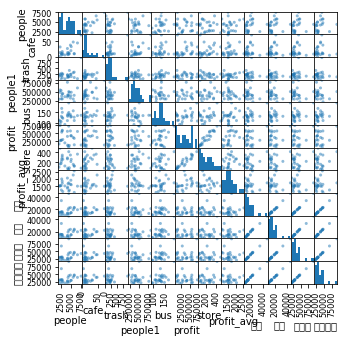

In [28]:
pd.scatter_matrix(seoul4, figsize=(5,5))
plt.show()

In [29]:
seoul4.corr()

,people,cafe,trash,people1,bus,profit,store,profit_avg,승차,하차,지하철,대중교통
people,1.000000,0.640121,0.443983,0.282457,0.256601,-0.153081,-0.209146,0.141226,0.233591,0.279778,0.256566,0.256712
cafe,0.640121,1.000000,0.605788,0.521680,0.158057,0.162543,0.171022,0.093866,0.003219,0.056756,0.029646,0.029839
trash,0.443983,0.605788,1.000000,0.466094,0.182207,-0.200430,-0.228869,0.072938,-0.000070,0.026818,0.013202,0.013441
people1,0.282457,0.521680,0.466094,1.000000,0.033211,0.026258,0.106199,-0.144418,-0.048428,-0.049117,-0.048805,-0.048720
bus,0.256601,0.158057,0.182207,0.033211,1.000000,0.291531,0.211469,0.211787,0.578654,0.588948,0.584175,0.585078
profit,-0.153081,0.162543,-0.200430,0.026258,0.291531,1.000000,0.949264,0.411056,0.161769,0.169345,0.165631,0.165898
store,-0.209146,0.171022,-0.228869,0.106199,0.211469,0.949264,1.000000,0.129662,0.171752,0.175277,0.173623,0.173774
profit_avg,0.141226,0.093866,0.072938,-0.144418,0.211787,0.411056,0.129662,1.000000,-0.014368,0.001292,-0.006650,-0.006354
승차,0.233591,0.003219,-0.000070,-0.048428,0.578654,0.161769,0.171752,-0.014368,1.000000,0.996959,0.999260,0.999252
하차,0.279778,0.056756,0.026818,-0.049117,0.588948,0.169345,0.175277,0.001292,0.996959,1.000000,0.999219,0.999225


# K-Means Clustering with seoul data

# Clustering 1

## 1) using Interia value 

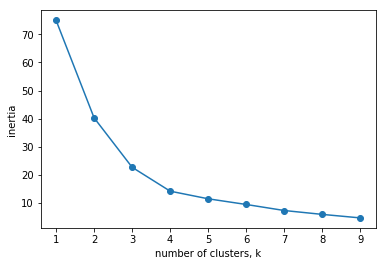

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# saciling 했을 때, 최적 k값 구하기

ks = range(1,10)
inertias = []
feature = seoul[['people','cafe','trash']]

for k in ks:
    scaler = StandardScaler()
    model = KMeans(n_clusters=k,algorithm='auto')
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 2) data scaling : StandardScaling & k=4 clustering

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

labels = pd.DataFrame(seoul.gu)
labels.columns=['labels']
feature = seoul[['people','cafe','trash']]

scaler = StandardScaler()
model = KMeans(n_clusters=4,algorithm='auto')
pipeline = make_pipeline(scaler,model)

pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

In [42]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict,labels],axis=1)

In [43]:
r

,people,cafe,trash,predict,labels
0,7475.529810,71,946,3,강남구
1,4519.882716,10,404,2,강동구
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
4,4368.951846,9,131,2,관악구
5,4383.014648,13,139,2,광진구
6,5728.976922,10,333,2,구로구
7,5751.071008,10,104,2,금천구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구


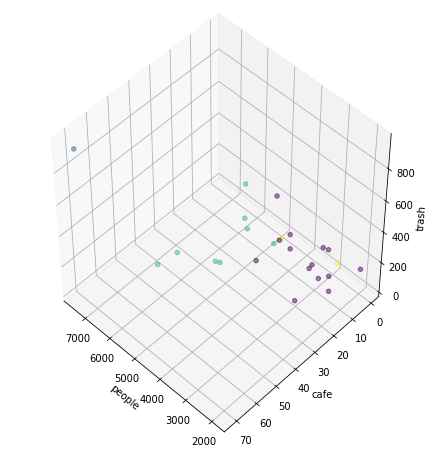

In [76]:
# 3d scatter plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(r['people'],r['cafe'],r['trash'],c=r['predict'],alpha=0.5)
ax.set_xlabel('people')
ax.set_ylabel('cafe')
ax.set_zlabel('trash')
plt.show()

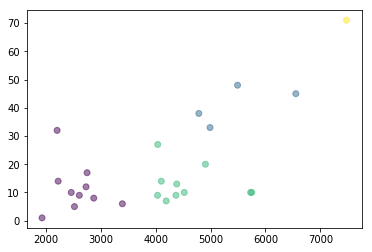

In [44]:
# 2개 scatter plot

plt.scatter(r['people'],r['cafe'],c=r['predict'],alpha=0.5)

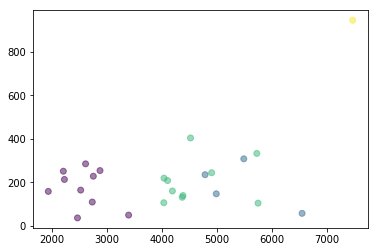

In [45]:
plt.scatter(r['people'],r['trash'],c=r['predict'],alpha=0.5)

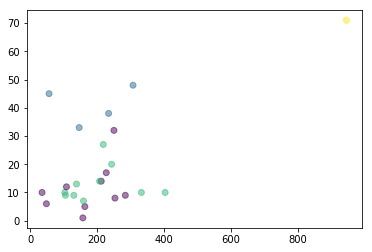

In [46]:
plt.scatter(r['trash'],r['cafe'],c=r['predict'],alpha=0.5)

In [47]:
r[r['predict']==0]

,people,cafe,trash,predict,labels
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구
10,2607.645607,9,285,0,동대문구
12,2202.409153,32,251,0,마포구
16,2729.478121,12,109,0,성북구
20,2748.654448,17,228,0,용산구
21,2870.580863,8,254,0,은평구
24,3392.070454,6,49,0,중랑구


In [48]:
r[r['predict']==1]

,people,cafe,trash,predict,labels
14,6553.781693,45,57,1,서초구
19,4989.607927,33,147,1,영등포구
22,4785.898808,38,235,1,종로구
23,5491.435925,48,308,1,중구


In [49]:
r[r['predict']==2]

,people,cafe,trash,predict,labels
1,4519.882716,10,404,2,강동구
4,4368.951846,9,131,2,관악구
5,4383.014648,13,139,2,광진구
6,5728.976922,10,333,2,구로구
7,5751.071008,10,104,2,금천구
11,4190.218382,7,160,2,동작구
13,4905.527357,20,244,2,서대문구
15,4033.618413,9,106,2,성동구
17,4036.932691,27,219,2,송파구
18,4102.219298,14,208,2,양천구


In [50]:
r[r['predict']==3]

,people,cafe,trash,predict,labels
0,7475.52981,71,946,3,강남구


# Clustering 2

## 1) using Interia value 

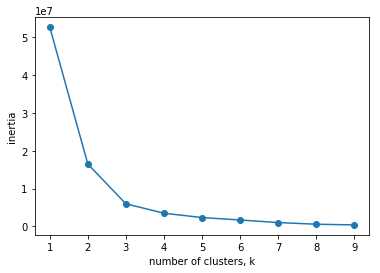

In [51]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 2) k=3 clustering 

In [52]:
labels = pd.DataFrame(seoul.gu)
labels.columns=['labels']
feature = seoul[['people','cafe','trash']]

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']        

# concatenate labels to df as a new column
r = pd.concat([feature,predict,labels],axis=1)

In [84]:
r[r['predict']==1]

,people,cafe,trash,predict,labels
0,7475.529810,71,946,1,강남구
6,5728.976922,10,333,1,구로구
7,5751.071008,10,104,1,금천구
14,6553.781693,45,57,1,서초구
23,5491.435925,48,308,1,중구


In [85]:
r[r['predict']==2]

,people,cafe,trash,predict,labels
1,4519.882716,10,404,2,강동구
4,4368.951846,9,131,2,관악구
5,4383.014648,13,139,2,광진구
11,4190.218382,7,160,2,동작구
13,4905.527357,20,244,2,서대문구
15,4033.618413,9,106,2,성동구
17,4036.932691,27,219,2,송파구
18,4102.219298,14,208,2,양천구
19,4989.607927,33,147,2,영등포구
22,4785.898808,38,235,2,종로구


In [87]:
r[r['predict']==0]

,people,cafe,trash,predict,labels
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구
10,2607.645607,9,285,0,동대문구
12,2202.409153,32,251,0,마포구
16,2729.478121,12,109,0,성북구
20,2748.654448,17,228,0,용산구
21,2870.580863,8,254,0,은평구
24,3392.070454,6,49,0,중랑구


# Clusutering with seoul5 data 

# Clusutering3

In [58]:
seoul4.head()
seoul5 = seoul4.iloc[:,[0,1,2,3,12]]

In [59]:
seoul5

,gu,people,cafe,trash,대중교통
0,강남구,7475.529810,71,946,43301.371877
1,강동구,4519.882716,10,404,23750.282866
2,강북구,2518.616801,5,164,68007.583537
3,강서구,2221.806591,14,213,21315.243675
4,관악구,4368.951846,9,131,92004.939144
5,광진구,4383.014648,13,139,44622.930331
6,구로구,5728.976922,10,333,45085.954224
7,금천구,5751.071008,10,104,47133.682103
8,노원구,2459.988383,10,36,30750.015189
9,도봉구,1928.049275,1,158,29333.675656


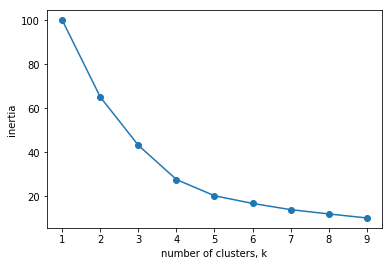

In [65]:
ks = range(1,10)
inertias = []
feature = seoul5[['people','cafe','trash','대중교통']]

for k in ks:
    scaler = StandardScaler()
    model = KMeans(n_clusters=k,algorithm='auto')
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

labels = pd.DataFrame(seoul5.gu)
labels.columns=['labels']
feature = seoul5[['people','cafe','trash','대중교통']]

scaler = StandardScaler()
model = KMeans(n_clusters=4,algorithm='auto')
pipeline = make_pipeline(scaler,model)

pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

In [67]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict,labels],axis=1)

In [68]:
r

,people,cafe,trash,대중교통,predict,labels
0,7475.529810,71,946,43301.371877,1,강남구
1,4519.882716,10,404,23750.282866,0,강동구
2,2518.616801,5,164,68007.583537,3,강북구
3,2221.806591,14,213,21315.243675,0,강서구
4,4368.951846,9,131,92004.939144,3,관악구
5,4383.014648,13,139,44622.930331,2,광진구
6,5728.976922,10,333,45085.954224,2,구로구
7,5751.071008,10,104,47133.682103,2,금천구
8,2459.988383,10,36,30750.015189,0,노원구
9,1928.049275,1,158,29333.675656,0,도봉구


In [69]:
r[r['predict']==0]

,people,cafe,trash,대중교통,predict,labels
1,4519.882716,10,404,23750.282866,0,강동구
3,2221.806591,14,213,21315.243675,0,강서구
8,2459.988383,10,36,30750.015189,0,노원구
9,1928.049275,1,158,29333.675656,0,도봉구
10,2607.645607,9,285,30704.266014,0,동대문구
11,4190.218382,7,160,38696.046838,0,동작구
12,2202.409153,32,251,30791.760550,0,마포구
15,4033.618413,9,106,21434.816650,0,성동구
16,2729.478121,12,109,31577.587030,0,성북구
17,4036.932691,27,219,26029.833547,0,송파구


In [70]:
r[r['predict']==1]

,people,cafe,trash,대중교통,predict,labels
0,7475.52981,71,946,43301.371877,1,강남구


In [71]:
r[r['predict']==2]

,people,cafe,trash,대중교통,predict,labels
5,4383.014648,13,139,44622.930331,2,광진구
6,5728.976922,10,333,45085.954224,2,구로구
7,5751.071008,10,104,47133.682103,2,금천구
13,4905.527357,20,244,28889.434771,2,서대문구
14,6553.781693,45,57,39026.604883,2,서초구
19,4989.607927,33,147,29281.473523,2,영등포구
22,4785.898808,38,235,46656.601455,2,종로구
23,5491.435925,48,308,39400.417272,2,중구


In [72]:
r[r['predict']==3]

,people,cafe,trash,대중교통,predict,labels
2,2518.616801,5,164,68007.583537,3,강북구
4,4368.951846,9,131,92004.939144,3,관악구


# DBSCAN with seoul data 

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 
import seaborn as sns 

# create model and prediction 
scaler = StandardScaler()

# seoul data -> eps=1, min_samples=2 -> 군집 2개

model = DBSCAN(eps=1, min_samples=2)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)

predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns = ['predict']

# concatenate labels to df as a new column 
r = pd.concat([feature, predict], axis=1)
r

In [181]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 
import seaborn as sns 

seoul_x = seoul.iloc[1:,:]
seoul_x = seoul_x.reset_index()
labels = pd.DataFrame(seoul_x.gu)
labels.columns=['labels']
feature = seoul_x[['people','cafe','trash']]


# create model and prediction 
scaler = StandardScaler()

# seoul data -> eps=1, min_samples=2 -> 군집 2개
# seoul.iloc[1:,:] -> eps=0.6, min_samples=2 -> 군집 4개
# seoul.iloc[1:,:] -> eps=0.5, min_samples=2 -> 군집 3개

model = DBSCAN(eps=0.5, min_samples=2)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)

predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns = ['predict']
predict = predict.reset_index()
# concatenate labels to df as a new column 
r = pd.concat([labels,feature, predict], axis=1)
r

,labels,people,cafe,trash,index,predict
0,강동구,4519.882716,10,404,0,-1
1,강북구,2518.616801,5,164,1,-1
2,강서구,2221.806591,14,213,2,-1
3,관악구,4368.951846,9,131,3,0
4,광진구,4383.014648,13,139,4,0
5,구로구,5728.976922,10,333,5,-1
6,금천구,5751.071008,10,104,6,-1
7,노원구,2459.988383,10,36,7,-1
8,도봉구,1928.049275,1,158,8,-1
9,동대문구,2607.645607,9,285,9,1


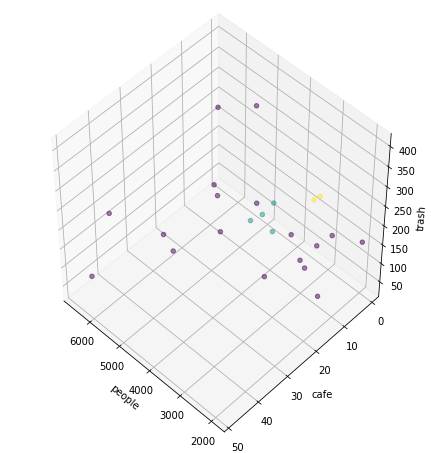

In [180]:
# 3d scatter plot 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(r['people'],r['cafe'],r['trash'],c=r['predict'],alpha=0.5)
ax.set_xlabel('people')
ax.set_ylabel('cafe')
ax.set_zlabel('trash')
plt.show()